# CS4120 Final Project
### Junhao Lin, Xianrui She

### 1. Data Display & Preprocessing

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [36]:
# reading the data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
# data preprocessing
# data preview
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# cut out the id columns and keep only texts and labels
train = train.iloc[:, -3:]

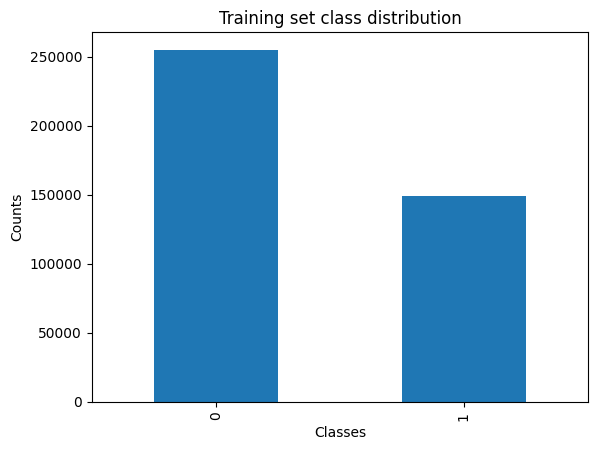

In [37]:
# class distribution
train['is_duplicate'].value_counts().plot.bar()
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Training set class distribution')
plt.show()

In [38]:
# cropping the training data so that classes are balanced (50/50)
min_length = len(train[train['is_duplicate']  == 1])
train_0 = train[train['is_duplicate']  == 0].sample(min_length, random_state=42)
# train_balanced = pd.concat([train_0, train[train['is_duplicate']  == 1]])
train_balanced = pd.concat([train_0[:min_length // 10], train[train['is_duplicate']  == 1][:min_length // 5]])

In [7]:
train_balanced.isna().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
train_balanced.dropna(axis=0)

,question1,question2,is_duplicate
362768,Do I legally have to let my employer know that...,Should I take a top-up home loan for doing up ...,0
172363,How do I jailbreak iOS 9.3.4?,How do I jailbreak iOS 9.2.1?,0
216382,Is my US income taxable if I am working on OPT...,I am working for company X. My client is Y (US...,0
303171,Why hasn't Ivanka Trump condemned the bigotry ...,How does it feel to date Ivanka Trump?,0
122527,Can a mortar shell be fired accurately without...,Why is my ex doing this?,0
...,...,...,...
40076,How does one learn to become a good DJ? What a...,How can someone become a good DJ?,1
40077,Which was the best Bollywood movie of 2016 so ...,Which are the best Bollywood movies of 2016?,1
40080,Where can I hire a call girl in Bangalore?,Where can I get call girls in Bangalore?,1
40081,Why do you waer makeup?,Why do girls wear makeup?,1


In [25]:
def normalize(text:str) -> list:
    ''' Function to tokenize our data correctly

    - input: text(str), unprocessed material
    - output: result(list), processed material
    '''
    # print(text)
    text = text.replace('%', ' percent ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')
    text = text.replace('¥', ' yuan ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    text = text.replace('[math]', '')
    
    # Replacing some numbers with string etextuivalents (not perfect, can be done better to account for more cases)
    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)

    # convert all stemmed words to its original form
    stemmer = SnowballStemmer('english')
    #text = stemmer.stem(text)
    tokens = word_tokenize(text)

    for i in range(len(tokens)):
        tokens[i] = stemmer.stem(tokens[i])
    
    return ' '.join(tokens)

    

In [39]:
# test for normalize
str1 = "I exchanged 10$ to 70.9999¥"

normalize(str1)

'i exchang 10 $ to 70.9999 yuan'

In [40]:
# tokenize sentences in training data 
train_text1 = list(train_balanced['question1'].apply(normalize))
train_text2 = list(train_balanced['question2'].apply(normalize))

# test['textuestion1'] = test['question1'].apply(normalize)
# test['textuestion2'] = test['question2'].apply(normalize)

In [41]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
text1_vec = vectorizer.fit_transform(train_text1)
text2_vec = vectorizer.fit_transform(train_text2)


In [42]:
from scipy.sparse import hstack
X = hstack((text1_vec, text2_vec))

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train,y_dev = train_test_split(X, train_balanced['is_duplicate'], test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_1 = LogisticRegression(solver='saga', penalty='l2', random_state=1)
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_dev)
accuracy_score(y_dev,y_pred)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7254354622599375

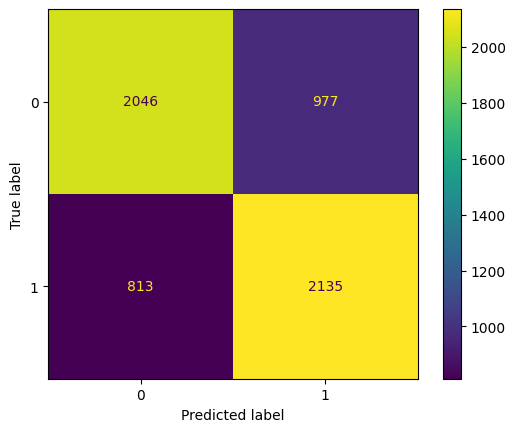

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_dev, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_1.classes_)
disp.plot()
plt.show()

i really dont know hat uwssikdj jkasjwifsk llalll